<a href="https://colab.research.google.com/github/piyush1856/hypothesis-testing-scipy/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!gdown 1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ

Downloading...
From: https://drive.google.com/uc?id=1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ
To: /content/updated_loan.csv
100% 67.0k/67.0k [00:00<00:00, 15.2MB/s]


In [4]:
data = pd.read_csv('/content/updated_loan.csv')
data.shape

(614, 18)

In [5]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


In [6]:
data["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [7]:
data['Dependents'].replace('3+', 3,inplace=True)

data["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3,51


In [8]:
data["Credit_History"].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [9]:
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Credit_History,50,8.143322
EMI,36,5.863192
Loan_Amount_per_year,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
CoapplicantIncome,0,0.000000


In [10]:
#num --> mean, median, mode, constant value, Simple imputer

In [11]:
data["Credit_History"].isna().sum()

50

In [12]:
data.shape

(614, 18)

In [13]:
pd.crosstab(data["Credit_History"],data["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [14]:
#chi-squared

In [15]:
from scipy.stats import chi2_contingency

In [16]:
# H0: Credit history  and Loan status is independent
# Ha : Dependent

In [17]:
chi2_contingency(pd.crosstab(data['Credit_History'], data['Loan_Status']))

Chi2ContingencyResult(statistic=174.63729658142535, pvalue=7.184759548750746e-40, dof=1, expected_freq=array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))

<Axes: xlabel='Credit_History', ylabel='count'>

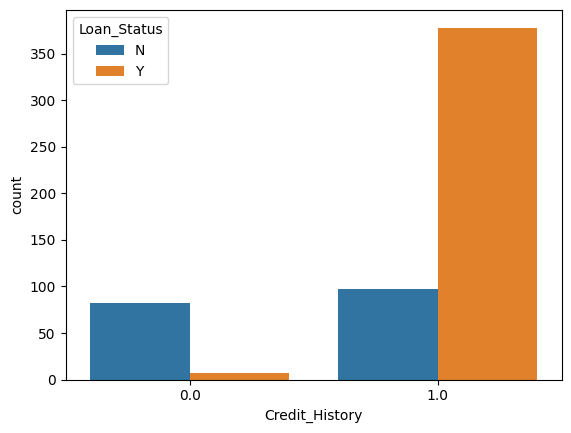

In [18]:
sns.countplot(x= data["Credit_History"],hue=data["Loan_Status"])

In [19]:
data["Credit_History"]=data["Credit_History"].fillna(2)
data["Credit_History"].value_counts()

,count
Credit_History,
1.0,475
0.0,89
2.0,50


In [20]:
data["Self_Employed"].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [21]:
data["Self_Employed"].isna().sum()

32

In [22]:
pd.crosstab(data['Self_Employed'], data['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [23]:
chi2_contingency(pd.crosstab(data['Self_Employed'], data['Loan_Status']))

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[157.21649485, 342.78350515],
       [ 25.78350515,  56.21649485]]))

In [24]:
data["Self_Employed"]=data["Self_Employed"].fillna("Other")

In [25]:
data["Self_Employed"].isna().sum()

0

In [26]:
data["Self_Employed"].value_counts()

,count
Self_Employed,
No,500
Yes,82
Other,32


In [27]:
chi2_contingency(pd.crosstab(data['Self_Employed'], data['Loan_Status']))

Chi2ContingencyResult(statistic=0.15849843135909122, pvalue=0.9238096679003514, dof=2, expected_freq=array([[156.35179153, 343.64820847],
       [ 10.00651466,  21.99348534],
       [ 25.64169381,  56.35830619]]))

In [28]:
#Simple imputer

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
a

,0
0,10.0
1,10.0
2,20.0
3,10.0
4,30.0
5,10.0
6,NaN
7,50.0


In [31]:
a.mean()

,0
0,20.0


In [32]:
SimpleImputer(strategy="mean").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

In [33]:
a.mode()

,0
0,10.0


In [34]:
SimpleImputer(strategy="most_frequent").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [35]:
SimpleImputer(strategy="constant",fill_value=1000).fit_transform(a)

array([[  10.],
       [  10.],
       [  20.],
       [  10.],
       [  30.],
       [  10.],
       [1000.],
       [  50.]])

In [36]:
a

,0
0,10.0
1,10.0
2,20.0
3,10.0
4,30.0
5,10.0
6,NaN
7,50.0


In [37]:
num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

# instance of simple imputer class with a median strategy
median_imputer = SimpleImputer(strategy = 'median')

for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [38]:
cat_missing = ['Gender', 'Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent') # mode
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [39]:
data.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [40]:
#Quiz 1

During EDA, you notice that the feature 'Age' has some missing values. What is an appropriate approach to handle missing data in this feature? Which code snippet accomplishes this? data = pd.DataFrame({'Age': [12, 15, 24, 25, 30, 44, 45, 32, None, 56, 51, 28, None, 98, 43, 52, 86, 91]})


<Axes: >

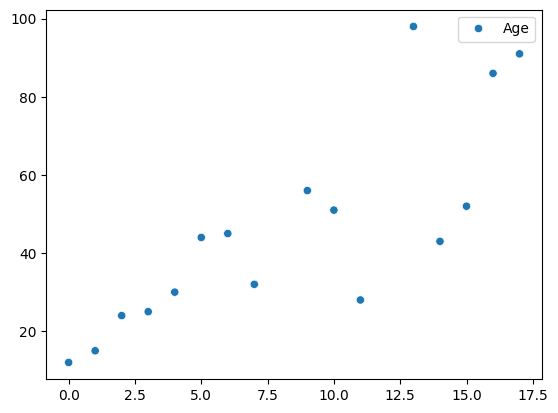

In [41]:
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns

# Assuming 'test_data' is a DataFrame with missing values in the 'Age' column
test_data = pd.DataFrame({'Age': [12, 15, 24, 25, 30, 44, 45, 32, None, 56, 51, 28, None, 98, 43, 52, 86, 91]})

sns.scatterplot(test_data)

In [42]:
# Create a SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Fit and transform the data
test_data['Age'] = imputer.fit_transform(test_data[['Age']])

# Print the imputed data
print(test_data)

     Age
0   12.0
1   15.0
2   24.0
3   25.0
4   30.0
5   44.0
6   45.0
7   32.0
8   43.5
9   56.0
10  51.0
11  28.0
12  43.5
13  98.0
14  43.0
15  52.0
16  86.0
17  91.0


In [43]:
#Outlier treatment

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            614 non-null    float64
 8   Loan_Amount_Term      614 non-null    float64
 9   Credit_History        614 non-null    float64
 10  Property_Area         614 non-null    object 
 11  Loan_Status           614 non-null    object 
 12  Income_bin            614 non-null    object 
 13  TotalIncome           614 non-null    float64
 14  TotalIncome_bin       614 non-null    object 
 15  Loan_Amount_per_year  6

In [45]:
df_num = data.select_dtypes(include = np.number)

df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'TotalIncome',
       'Loan_Amount_per_year', 'EMI', 'Able_to_pay_EMI'],
      dtype='object')

In [46]:
df_num.drop(['Credit_History','Able_to_pay_EMI'],axis=1,inplace=True)
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


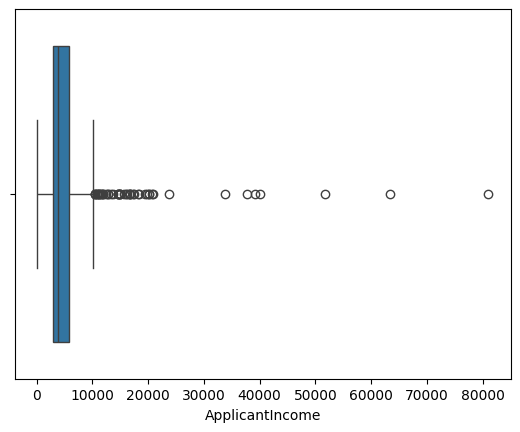

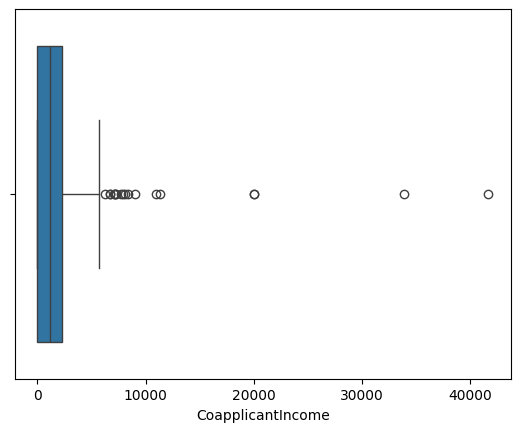

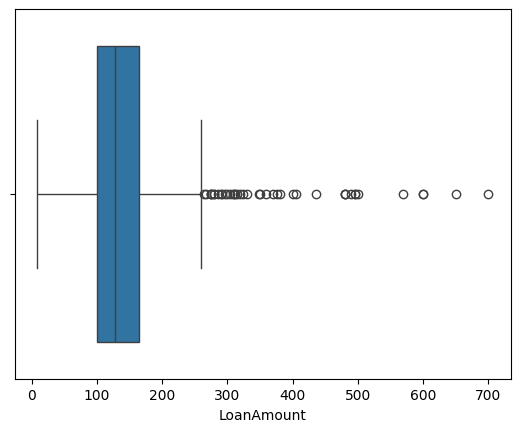

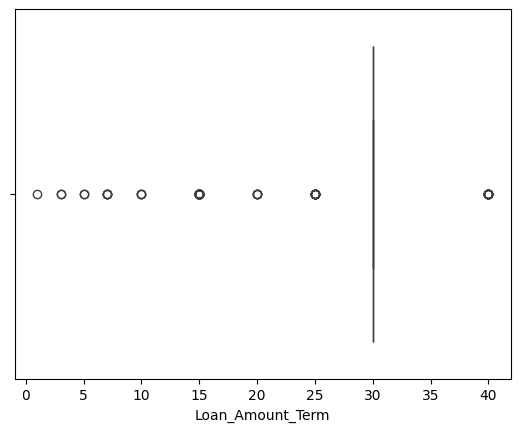

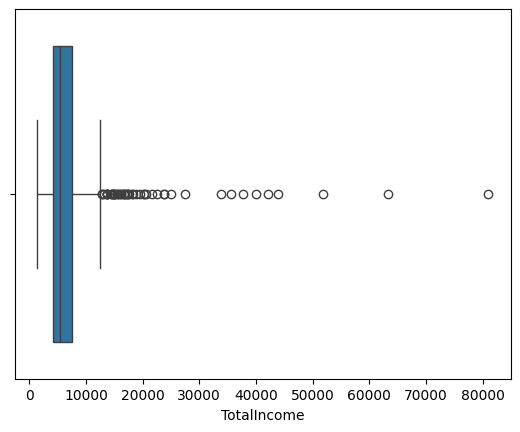

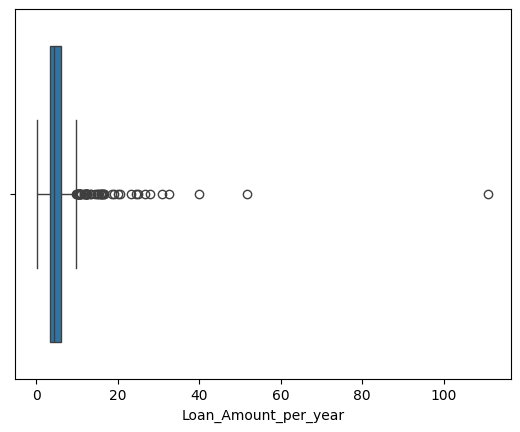

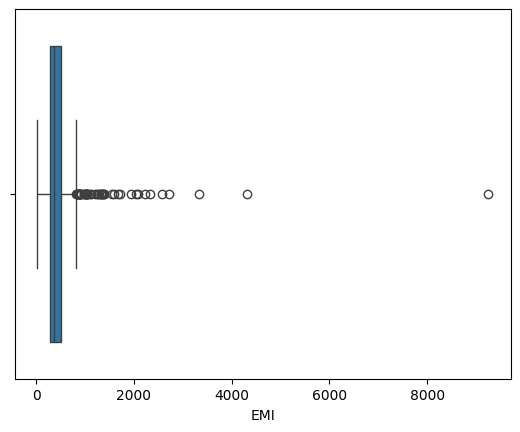

In [47]:
for col in enumerate(df_num):
    sns.boxplot(x=col[1],data=df_num)
    plt.show()

In [48]:
#IQR(Inter Quartile Range) Method 1:

In [49]:
Q1 = df_num.quantile(0.25)

In [50]:
Q3 = df_num.quantile(0.75)

In [51]:
IQR = Q3 - Q1
IQR

,0
ApplicantIncome,2917.500000
CoapplicantIncome,2297.250000
LoanAmount,64.500000
Loan_Amount_Term,0.000000
TotalIncome,3355.750000
Loan_Amount_per_year,2.500000
EMI,208.333333


In [52]:
#(df_num < (Q1-1.5 * IQR))|(df_num > (Q3 + 1.5 * IQR))

In [53]:
data_iqr = data[~((df_num < (Q1-1.5 * IQR))|(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

In [54]:
data_iqr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,Medium,5849.0,High,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


In [55]:
data_iqr.shape

(458, 18)

In [56]:
#Z-score or Standard score
import scipy
from scipy import stats

In [57]:
z_scores_LoanAmount = scipy.stats.zscore(df_num["LoanAmount"])

In [58]:
z_scores_LoanAmount

,LoanAmount
0,-0.211241
1,-0.211241
2,-0.948996
3,-0.306435
4,-0.056551
...,...
609,-0.889500
610,-1.258378
611,1.276168
612,0.490816


In [59]:
row_index_less = np.where(z_scores_LoanAmount < -3)

In [60]:
print(row_index_less)

(array([], dtype=int64),)


In [61]:
row_index_more = np.where(z_scores_LoanAmount > 3)

In [62]:
print(row_index_more)

(array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
       561, 604]),)


In [63]:
len(row_index_less[0]) + len(row_index_more[0])

15

In [64]:
df_LoanAmount_zscore = data["LoanAmount"][~(( z_scores_LoanAmount < -3) |(z_scores_LoanAmount > 3))]

In [65]:
df_LoanAmount_zscore.shape

(599,)

In [66]:
#Quiz 2

You have a dataset with the following values: [15, 18, 22, 23, 25, 28, 40, 75, 200]. After applying the IQR method for outlier treatment, which values would be considered outliers?

In [67]:
data = np.array([15, 18, 22, 23, 25, 28, 40, 75, 200])

In [68]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1


In [69]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [70]:
outliers = [value for value in data if value < lower_bound or value > upper_bound]

In [71]:
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Identified Outliers:", outliers)

Lower Bound: -5.0
Upper Bound: 67.0
Identified Outliers: [75, 200]


In [72]:
#Encoding

In [73]:
data_iqr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,Medium,5849.0,High,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


In [74]:
data_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                458 non-null    object 
 1   Married               458 non-null    object 
 2   Dependents            458 non-null    object 
 3   Education             458 non-null    object 
 4   Self_Employed         458 non-null    object 
 5   ApplicantIncome       458 non-null    int64  
 6   CoapplicantIncome     458 non-null    float64
 7   LoanAmount            458 non-null    float64
 8   Loan_Amount_Term      458 non-null    float64
 9   Credit_History        458 non-null    float64
 10  Property_Area         458 non-null    object 
 11  Loan_Status           458 non-null    object 
 12  Income_bin            458 non-null    object 
 13  TotalIncome           458 non-null    float64
 14  TotalIncome_bin       458 non-null    object 
 15  Loan_Amount_per_year  458 no

In [75]:
num=data_iqr.select_dtypes(include=np.number)
num.drop(['Able_to_pay_EMI','Credit_History'],axis=1,inplace=True)
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


In [76]:
cat = data_iqr.select_dtypes(include=['object'])
cat.drop('Loan_Status',axis=1,inplace=True)
cat['Able_to_pay_EMI'] = data_iqr['Able_to_pay_EMI']
cat['Credit_History'] = data_iqr['Credit_History']
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Income_bin,TotalIncome_bin,Able_to_pay_EMI,Credit_History
0,Male,No,0,Graduate,No,Urban,Medium,High,0,1.0
1,Male,Yes,1,Graduate,No,Rural,Medium,High,1,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Average,Low,1,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Average,Average,1,1.0
4,Male,No,0,Graduate,No,Urban,Medium,High,1,1.0


In [77]:
Target = data_iqr['Loan_Status']
Target.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [78]:
#Three types -- OHE, Label, Target

In [79]:
cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Income_bin', 'TotalIncome_bin', 'Able_to_pay_EMI',
       'Credit_History'],
      dtype='object')

In [80]:
Target.value_counts()

,count
Loan_Status,
Y,325
N,133


In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
col='Loan_Status'
label_encoder=LabelEncoder()
data_iqr[col]=label_encoder.fit_transform(data_iqr[col])
data_iqr[col].value_counts()

,count
Loan_Status,
1,325
0,133


In [83]:
col="Gender"
data_iqr[col]=label_encoder.fit_transform(data_iqr[col])
data_iqr[col].value_counts()

col="Married"
data_iqr[col]=label_encoder.fit_transform(data_iqr[col])
data_iqr[col].value_counts()

col="Education"
data_iqr[col]=label_encoder.fit_transform(data_iqr[col])
data_iqr[col].value_counts()

,count
Education,
0,353
1,105


In [84]:
col="Property_Area"
data_iqr[col].value_counts()

,count
Property_Area,
Semiurban,178
Rural,143
Urban,137


In [85]:
#Target Encoding

In [86]:
pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.8 MB/s eta 0:00:00


In [87]:
from category_encoders import TargetEncoder

In [88]:
pd.crosstab(data_iqr["Property_Area"], data_iqr["Loan_Status"])

Loan_Status,0,1
Property_Area,,
Rural,52,91
Semiurban,36,142
Urban,45,92


In [89]:
pd.crosstab(data_iqr["Property_Area"], data_iqr["Loan_Status"],normalize="index")

Loan_Status,0,1
Property_Area,,
Rural,0.363636,0.636364
Semiurban,0.202247,0.797753
Urban,0.328467,0.671533


In [90]:
# P(LS = 1 | PA = "Rural")  --> Correct
# P(PA= "Rural" | LS = 1) --> Incorrect

In [91]:
pd.crosstab(data_iqr["Property_Area"], data_iqr["Loan_Status"],margins=True)

Loan_Status,0,1,All
Property_Area,,,
Rural,52,91,143
Semiurban,36,142,178
Urban,45,92,137
All,133,325,458


In [92]:
91/143

0.6363636363636364

In [93]:
col="Property_Area"
te=TargetEncoder()

In [94]:
data_iqr[col]=te.fit_transform(data_iqr[col],data_iqr["Loan_Status"])
data_iqr[col].value_counts()

,count
Property_Area,
0.797753,178
0.636364,143
0.671533,137


In [95]:

col="Self_Employed"
te=TargetEncoder()
data_iqr[col]=te.fit_transform(data_iqr[col],data_iqr["Loan_Status"])
data_iqr[col].value_counts()

col="Dependents"
te=TargetEncoder()
data_iqr[col]=te.fit_transform(data_iqr[col],data_iqr["Loan_Status"])
data_iqr[col].value_counts()

col="Income_bin"
te=TargetEncoder()
data_iqr[col]=te.fit_transform(data_iqr[col],data_iqr["Loan_Status"])
data_iqr[col].value_counts()

col="TotalIncome_bin"
te=TargetEncoder()
data_iqr[col]=te.fit_transform(data_iqr[col],data_iqr["Loan_Status"])
data_iqr[col].value_counts()

,count
TotalIncome_bin,
0.700000,190
0.735135,185
0.725803,44
0.627644,39


In [96]:
data_iqr.dtypes

,0
Gender,int64
Married,int64
Dependents,float64
Education,int64
Self_Employed,float64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [97]:
s = (data_iqr.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

[]

In [98]:
#Scaling --> #Normalization(0,1) & Standardization(mu = 0, std = const.)

In [99]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


In [100]:
print(" The minimum value of the LoanAmount:",data_iqr['LoanAmount'].min(),"\n",
      "The maximum value of the LoanAmount:", data_iqr['LoanAmount'].max())

 The minimum value of the LoanAmount: 9.0 
 The maximum value of the LoanAmount: 260.0


In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
standard_scale = StandardScaler()

In [103]:
num['Scaled_LoanAmount'] = standard_scale.fit_transform(num[['LoanAmount']])

In [104]:
print(" The minimum value of the sales:",num['Scaled_LoanAmount'].min(),"\n",
      "The maximum value of the sales:", num['Scaled_LoanAmount'].max())

 The minimum value of the sales: -2.7081096824702664 
 The maximum value of the sales: 2.979741979703463


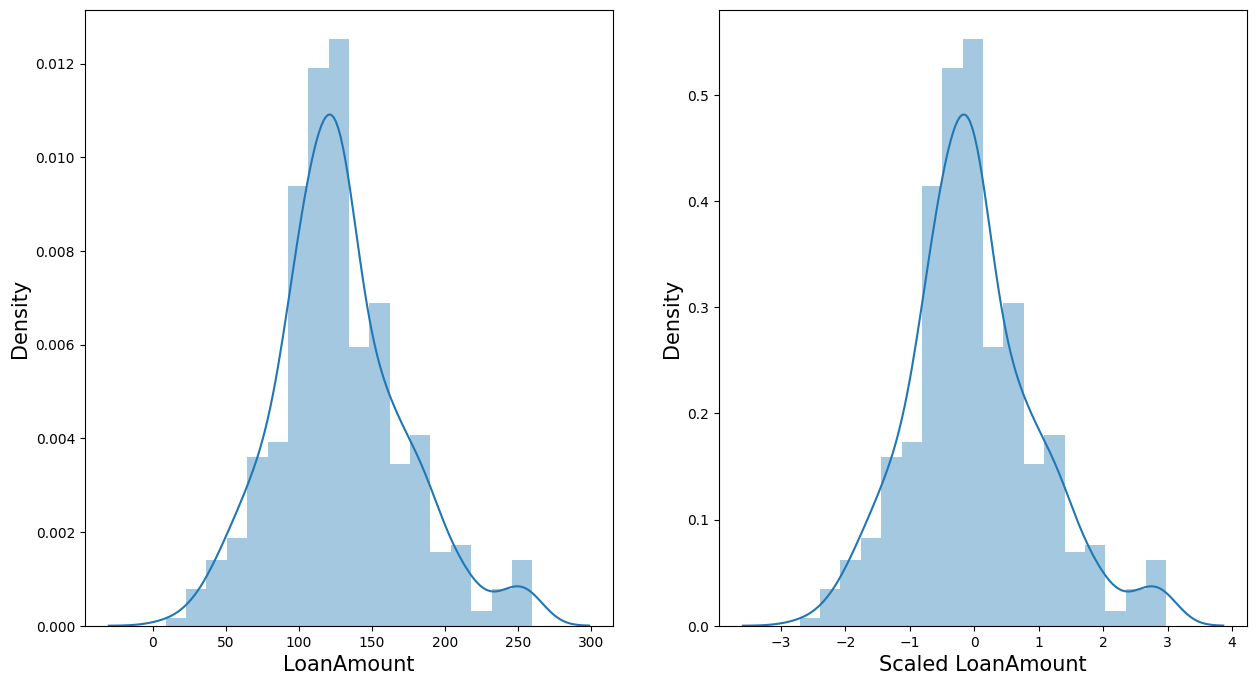

In [105]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
plt.subplot(1,2,1)

# plot the distribution of the original variable
# axlabel: label the x-axis
sns.distplot(num['LoanAmount'])
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('LoanAmount', fontsize=15)

# We create a subplot of 1 row by 2 columns
# use the second column for plotting
plt.subplot(1,2,2)

# plot the distribution of the scaled variable
# axlabel: label the x-axis
sns.distplot(num['Scaled_LoanAmount'])
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('Scaled LoanAmount', fontsize=15)
# display the plot
plt.show()

In [106]:
#Normalization

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
min_max = MinMaxScaler()

In [109]:
num['minmax_LoanAmount'] = min_max.fit_transform(num[['LoanAmount']])

In [110]:
num['minmax_LoanAmount'].min(), num['minmax_LoanAmount'].max()

(0.0, 1.0)

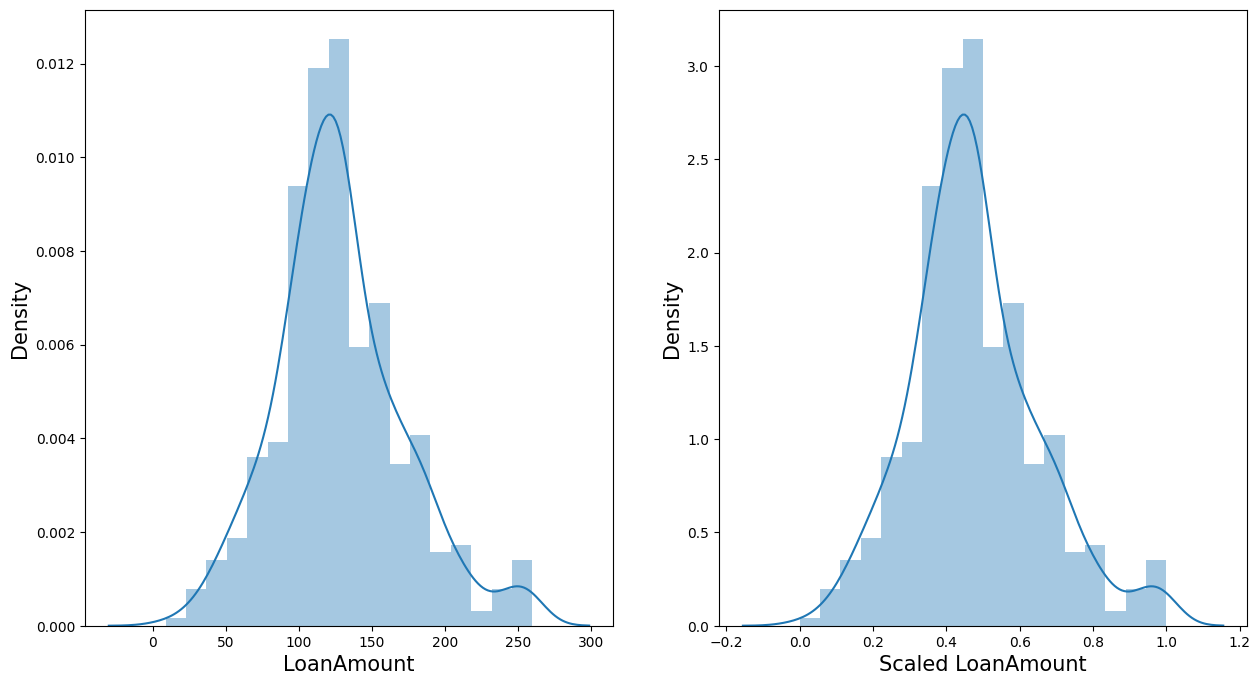

In [111]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# We create a subplot of 1 row by 2 columns
# use the first column for plotting
plt.subplot(1,2,1)

# plot the distribution of the original variable
# axlabel: label the x-axis
sns.distplot(num['LoanAmount'], axlabel='LoanAmount')
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('LoanAmount', fontsize=15)

# we create a subplot of 1 row by 2 columns
# use the second column for plotting
plt.subplot(1,2,2)

# plot the distribution of the scaled variable
# axlabel: label the x-axis
sns.distplot(num['minmax_LoanAmount'], axlabel='Scaled LoanAmount')
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('Scaled LoanAmount', fontsize=15)

# display the plot
plt.show()

In [112]:
import scipy
from scipy.stats import shapiro

In [113]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI,Scaled_LoanAmount,minmax_LoanAmount
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778,-0.011479,0.474104
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556,-0.011479,0.474104
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333,-1.416446,0.227092
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333,-0.192765,0.442231
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667,0.283111,0.525896


In [114]:
num.drop(['Scaled_LoanAmount','minmax_LoanAmount'],axis=1,inplace=True)
for i in num.columns:
    print('Column',i,':',shapiro(num[i]))

Column ApplicantIncome : ShapiroResult(statistic=0.9215287708204641, pvalue=1.0194749031910956e-14)
Column CoapplicantIncome : ShapiroResult(statistic=0.8516965530524995, pvalue=2.3174147300651245e-20)
Column LoanAmount : ShapiroResult(statistic=0.9753212885449623, pvalue=5.346698710419568e-07)
Column Loan_Amount_Term : ShapiroResult(statistic=1.0, pvalue=1.0)
Column TotalIncome : ShapiroResult(statistic=0.9550975553022599, pvalue=1.381294243141998e-10)
Column Loan_Amount_per_year : ShapiroResult(statistic=0.9740893956115726, pvalue=2.9408826583310763e-07)
Column EMI : ShapiroResult(statistic=0.9740893956115724, pvalue=2.9408826583307677e-07)


In [115]:
mm = MinMaxScaler()
mmsfit = mm.fit(num)
df_scaled = pd.DataFrame(mm.fit_transform(num),columns=num.columns)
df_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,0.570528,0.000000,0.474104,0.0,0.414153,0.488048,0.488048
1,0.443788,0.268089,0.474104,0.0,0.436895,0.474104,0.474104
2,0.285314,0.000000,0.227092,0.0,0.146415,0.227092,0.227092
3,0.243568,0.419200,0.442231,0.0,0.328822,0.442231,0.442231
4,0.585644,0.000000,0.525896,0.0,0.428343,0.525896,0.525896
